In [39]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df = pd.read_csv("HousingData.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [42]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
df.shape

(506, 14)

In [44]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [45]:
df = df.fillna(df.median())

In [46]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [48]:
x = df.drop(columns = ['MEDV'])
y = df['MEDV']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
model = Sequential([
    Dense(128,activation="relu",input_shape=(13,)),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1)
])

model.compile(optimizer = "adam", loss="mse", metrics=["mae"])
model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=0.03)

C:\Users\91766\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 582.5608 - mae: 22.4016 - val_loss: 611.0856 - val_mae: 22.3677
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 538.8019 - mae: 21.5987 - val_loss: 525.2722 - val_mae: 20.2408
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 439.8998 - mae: 19.2392 - val_loss: 333.7837 - val_mae: 14.5841
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 236.4585 - mae: 13.2889 - val_loss: 133.0820 - val_mae: 9.4847
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.0833 - mae: 8.0173 - val_loss: 100.6524 - val_mae: 8.9536
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.2701 - mae: 6.1345 - val_loss: 55.2427 - val_mae: 5.4778
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.8716 - mae: 4.5080 - val_loss: 35.7048 - val_mae: 4.1901
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2685 - mae: 3.7818 - val_loss: 26.0715 - val_mae: 3.6174
Epoch 9/150
12/12 ━━━━━━━━━━━━━

In [53]:
loss, mae = model.evaluate(x_test,y_test)
print(loss,mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0176 - mae: 2.4333
17.412559509277344 2.5090994834899902


In [54]:
y_pred = model.predict(x_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/stepWARNING:tensorflow:6 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000223B57C2980> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

In [56]:
print(rmse, r2)

4.172835748945609 0.8461870132255285


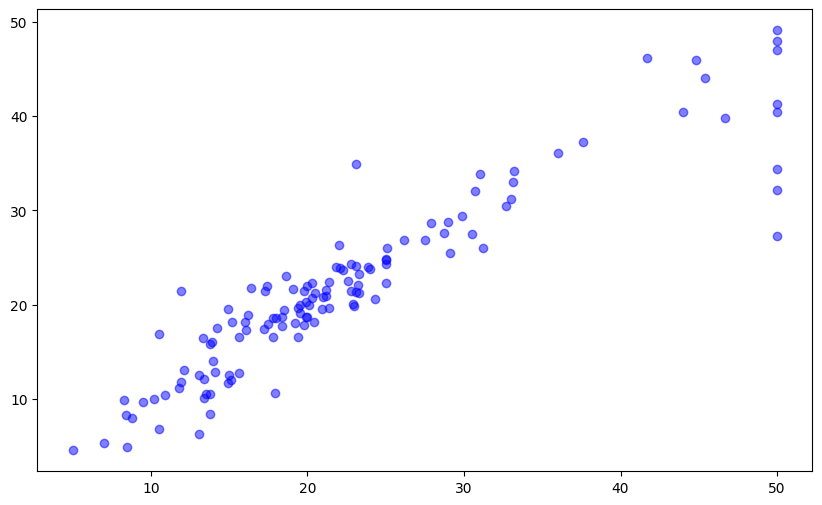

In [57]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred,alpha=0.5,color="blue")